In [12]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [13]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
l1 = read_txt('../collection1/CS109a_light.txt')
l2 = read_txt('../collection2/CS109a_light.txt')
l3 = read_txt('../collection3/CS109a_light.txt')
l4 = read_txt('../collection4/CS109a_light.txt')
l5 = read_txt('../collection5/CS109a_light.txt')
l6 = read_txt('../collection6/CS109a_light.txt')
l7 = read_txt('../collection7/CS109a_light.txt')
l8 = read_txt('../collection8/CS109a_light.txt')
l9 = read_txt('../collection9/CS109a_light.txt')

In [14]:
# generate start times (every 30 minutes) from initial start dates
oct23 = datetime.datetime(2019, 10, 23, hour=8, minute=16)
oct29 = datetime.datetime(2019, 10, 29, hour=22, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)
nov16 = datetime.datetime(2019, 11, 16, hour=9, minute=0) # temp, press, hum every 15 min
nov21 = datetime.datetime(2019, 11, 21, hour=8, minute=53)
nov26 = datetime.datetime(2019, 11, 26, hour=13, minute=7)
dec2 = datetime.datetime(2019, 12, 2, hour=8, minute=35)

def compute_time_int(start_dt, light, minute=5):
    dates = [start_dt]
    for i in range(len(light)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=minute))
    df = pd.DataFrame({'date': dates,'light': light})
    df.drop(df.tail(1).index,inplace=True)
    return df

df0 = compute_time_int(oct23, l1, minute=30)
df1 = compute_time_int(oct29, l2)
df2 = compute_time_int(nov3, l3)
df3 = compute_time_int(nov6, l4)
df4 = compute_time_int(nov11, l5)
df5 = compute_time_int(nov16, l6)
df6 = compute_time_int(nov21, l7)
df7 = compute_time_int(nov26, l8)
df8 = compute_time_int(dec2, l9)

In [15]:
def convert_to_float(dfs):
    for df in dfs:
        df.light = [float(i) for i in df.light]

def fill_in_dates(start_dt, end_dt):
    in_between = []
    cur_dt = start_dt
    in_between.append(cur_dt)
    while cur_dt <= end_dt:
        cur_dt += datetime.timedelta(minutes=5)
        in_between.append(cur_dt)
    return in_between

def create_large_df(dfs, ls=None, fill_in=False):
    if fill_in:
        b0 = fill_in_dates(max(df0.date), min(df1.date))
        b1 = fill_in_dates(max(df1.date), min(df2.date))
        b2 = fill_in_dates(max(df2.date), min(df3.date))
        b3 = fill_in_dates(max(df3.date), min(df4.date))

    #     df01 = pd.DataFrame({'date': b1, 'light': float(l1[-2])*np.ones(len(b1))})
        df11 = pd.DataFrame({'date': b1, 'light': float(l2[-2])*np.ones(len(b1))})
        df21 = pd.DataFrame({'date': b2, 'light': float(l3[-2])*np.ones(len(b2))})
        df31 = pd.DataFrame({'date': b3, 'light': float(l4[-2])*np.ones(len(b3))})

        light = pd.concat([df0,df1,df11,df2,df21,df3,df31,df4], axis=0)
    else:
        
        light = pd.concat(dfs, axis=0)
    return light

def assign_numerical_date_vals(df):
    df2 = df.copy()
    month = []
    day = []
    hour = []
    minute = []
    weekday = []
    for i,dt in enumerate(df2['date']):
        month.append(dt.month)
        day.append(dt.day)
        hour.append(dt.hour)
        minute.append(dt.minute)
        weekday.append(dt.weekday())

    df2['month'] = month
    df2['day'] = day
    df2['hour'] = hour
    df2['minute'] = minute
    df2['weekday'] = weekday
    return df2

def get_day_labels(df):
    days = df['day']
    unique_days =list(np.unique(days))
#     print(unique_days)
    indexes = np.unique(days, return_index=True)[1]
    dates_in_order = [days.values[index] for index in sorted(indexes)]
    return dates_in_order

def calendar_plot(df, dates_in_order, feature):
    fig, ax = plt.subplots(6,6, figsize=(18,15), sharey=True)
    ax = ax.flatten()

    for i,d in enumerate(dates_in_order):
        temp = df[df['day'] == d]
        ax[i].scatter(temp['hour'], temp[feature])
        ax[i].set_title("Day {}".format(d))
    plt.suptitle(feature)
    plt.xlabel("Hour")
    plt.ylabel(feature)
    plt.show()


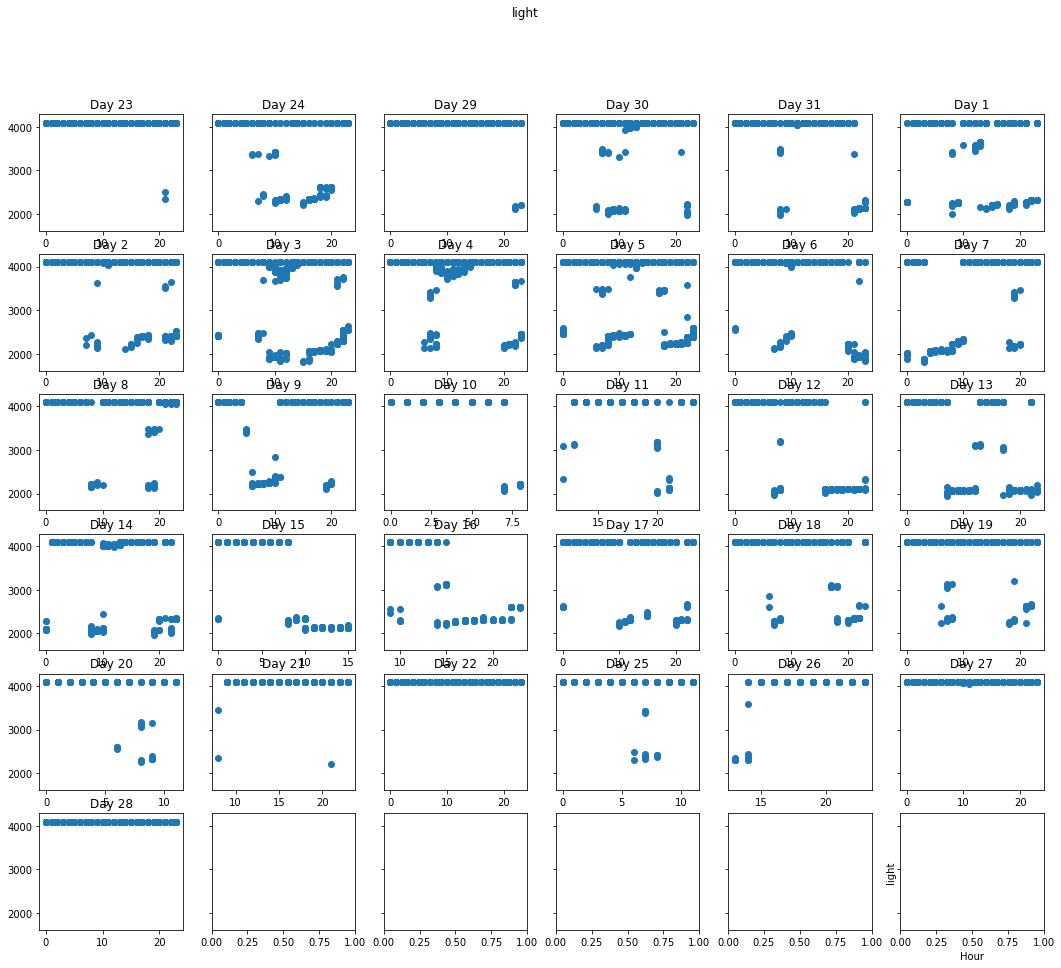

In [16]:
dfs = [df0,df1,df2,df3,df4, df5, df6, df7, df8]   

# convert light values to floats
convert_to_float(dfs)

# create large df from all collection samples
dfs_to_concat = [df0, df1, df2, df3, df4, df5, df6, df7,df8]
# ls = [l1, l2, l3, l4]
light = create_large_df(dfs_to_concat)  

# plot based on calendar day
light2 = assign_numerical_date_vals(light)
dates_in_order = get_day_labels(light2)
calendar_plot(light2, dates_in_order, 'light')

In [17]:
def ave_light(x):
    x['avg_hrly_light'] = np.mean(x['light'])
    return x

light3 = light2.groupby(['month','day', 'hour']).apply(ave_light)
light4 = light3.drop(columns=['date', 'minute', 'light'])
light5 = light4.drop_duplicates(subset=["month","day", 'hour'])

In [33]:
# for dt in light2['date']:
#     print(dt.month,dt.day,dt.weekday())
#     break

In [30]:
for i in range(temp.shape[0]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
temp.iloc[0,:]

month    10
day      23
Name: 0, dtype: int64

In [35]:
# temp = light5[['month', 'day']]
# for i in range(temp.shape[0]):
#     print(temp.iloc[i,:])

In [11]:
light5.to_csv('light_df.csv')

In [82]:
# for df in dfs:
#     plt.scatter(np.arange(df.shape[0]),df.light) #np.arange(humidity.shape[0]),
#     plt.show()

In [83]:
# oct29th = []
# oct30th = []
# oct31st = []
# nov1st = []
# nov2nd = []

# for i,dt in enumerate(df1.date):
#     if int(dt.day) == 29:
#         oct29th.append(i)
#     elif int(dt.day) == 30:
#         oct30th.append(i)
#     elif int(dt.day) == 31:
#         oct31st.append(i)
#     elif int(dt.day) == 1:
#         nov1st.append(i)
#     elif int(dt.day) == 2:
#         nov2nd.append(i)
# for dt in [nov1st]:
#     plt.scatter(np.arange(df1.loc[dt, 'light'].shape[0]),df1.loc[dt, 'light'])
# plt.show()

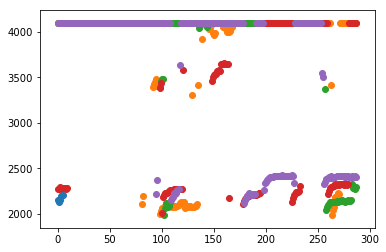

In [80]:
for dt in [oct29th,oct30th,oct31st,nov1st,nov2nd]:
    plt.scatter(np.arange(df1.loc[dt, 'light'].shape[0]),df1.loc[dt, 'light'])
plt.show()

In [84]:
# for dt in [oct29th]:
#     plt.scatter(np.arange(df1.loc[dt, 'light'].shape[0]),df1.loc[dt, 'light'])
# plt.show()

In [82]:
def find_rows(df, day_of_interest):
    rows = []
    for i,dt in enumerate(df.date):
        if dt.day == day_of_interest:
            rows.append(i) 
    return rows

In [83]:
def plot_days(df, data_name, rows, label):
    
    # Create x axis based on hour of day
    x_plot = []
    for i,dt in enumerate(df.date):
        x_vals = dt.hour + dt.minute/60 + dt.second/60
#         print(x_vals)
        x_plot.append(x_vals)
    
    # Plot hour of day vs. data value
    plt.scatter(x_plot[rows[0]:rows[0]+len(rows)], df[data_name].values[rows],  
                label = label, alpha = 0.5, cmap = 'RdPu')

    # Label plot
    plt.xlabel('Hour of Day', fontsize = 15)
    plt.ylabel('Data Value', fontsize = 15)
    plt.legend()
    

In [84]:
days = []
for dt in light.date:
    days.append(dt.day)
days = np.unique(days)

indices_of_dates = []
for day in days:
    indices_of_dates.append(find_rows(light,day))

In [85]:
len(days)

20

In [88]:
plt.subplots(figsize = (20,12))
# 29,3,6,11
calendar_day = ['Oct23','Oct29', 'Oct30','Oct31','Nov1', 'Nov2','Nov3','Nov4','Nov5',
               'Nov6','Nov7','Nov8','Nov9','Nov10','Nov11','Nov12','Nov13',
                'Nov14','Nov15']
# print(len(calendar_day))
for i in range(len(indices_of_dates)):
    plot_days(light, 'light', indices_of_dates[i], calendar_day[i])
plt.show()


IndexError: list index out of range

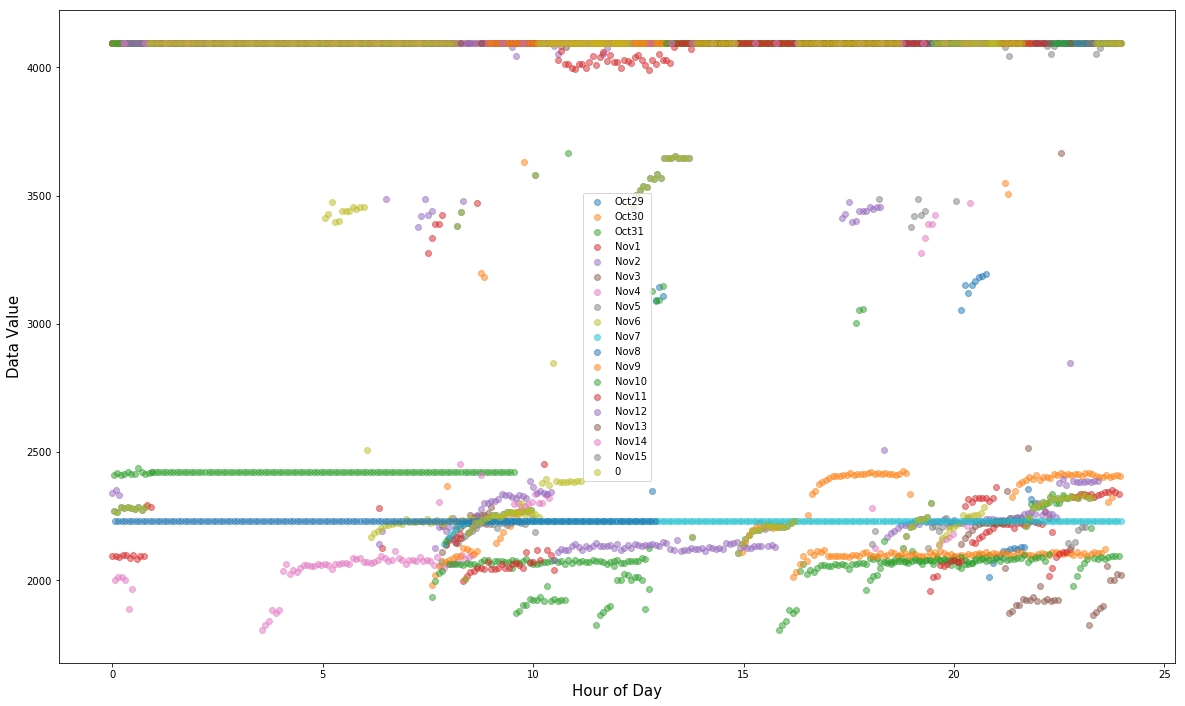

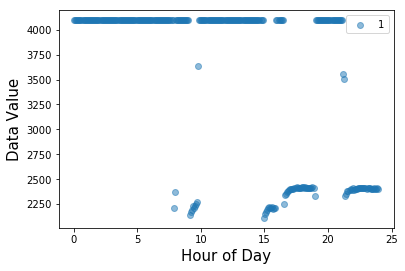

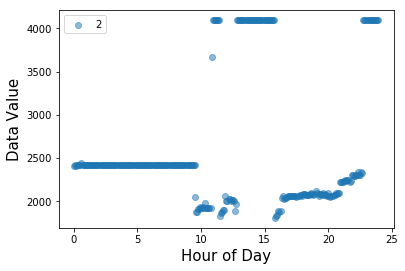

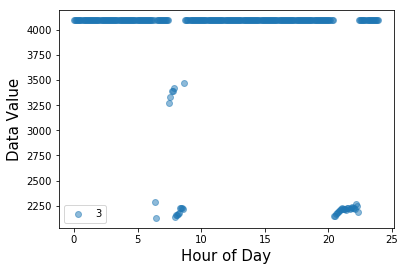

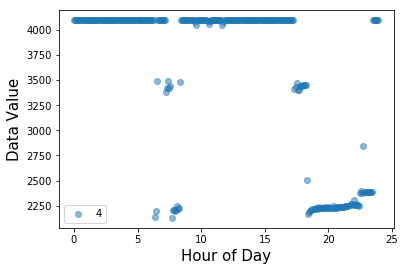

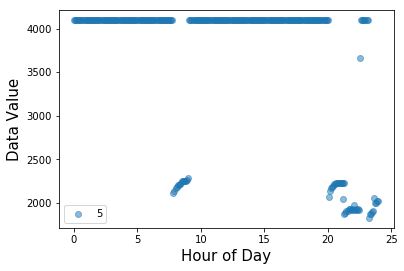

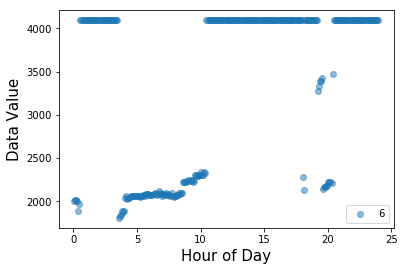

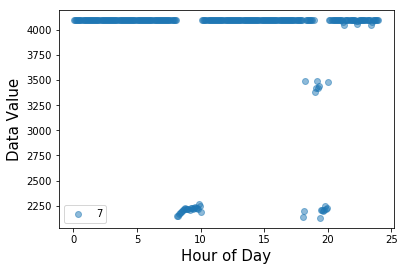

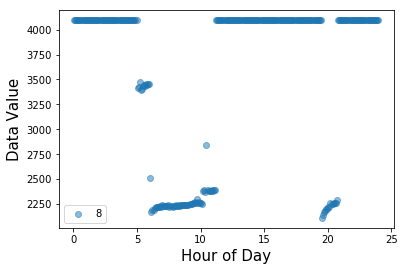

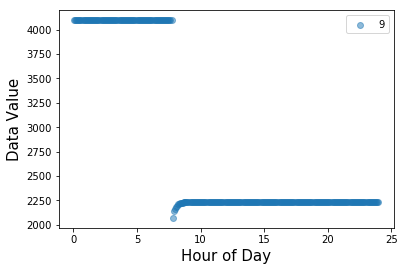

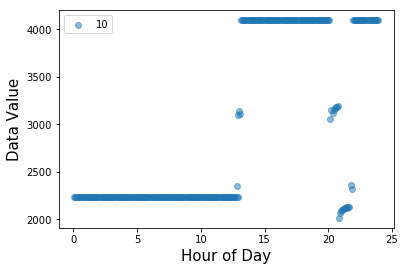

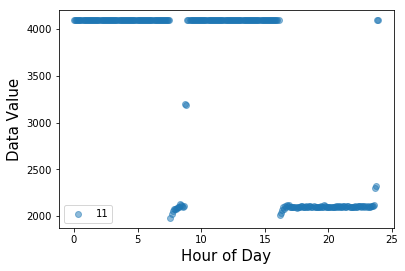

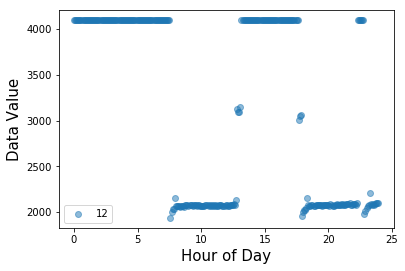

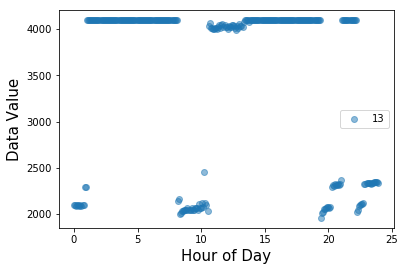

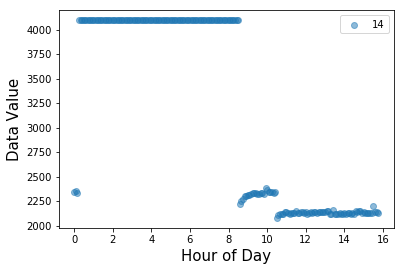

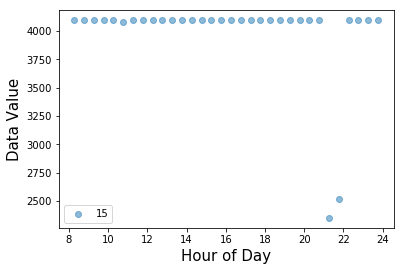

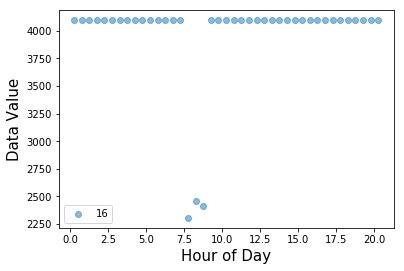

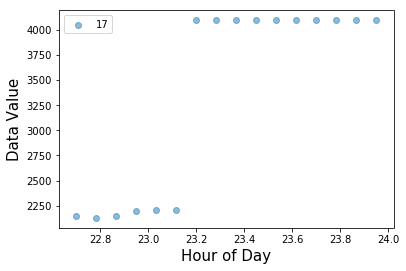

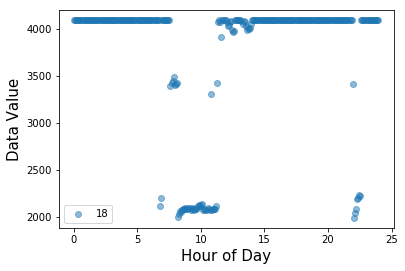

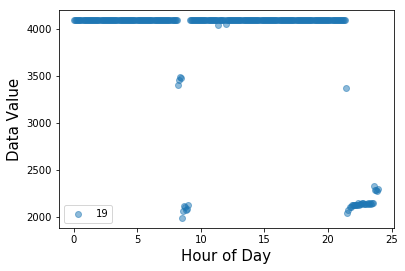

In [87]:
for i in range(len(indices_of_dates)):
    plot_days(light, 'light', indices_of_dates[i], str(i))
    plt.show()